# **Notebook to directly plot the prompts for better and faster Prototyping.**

In [1]:
from typing import List, Dict

In [2]:
import os
os.environ['GROQ_API_KEY'] = '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'

In [3]:
#Setting Groq client

from groq import Groq

GroqClient = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

In [4]:
#Exploring Groq API

chat_completion = GroqClient.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You are an History Teacher Specialized in U.S. American history" #. You always return your answer in JSON format."
        },
        {
            "role": "user",
            "content": "Who was the first U.S.A. President?",
        }
    ],
    model="llama3-70b-8192",
    #Temperature controls randomness: As the temperature approaches zero, the model will become deterministic and repetitive, Values from 0 to 2 - can be float.
    #If you adjust the temperature to 0.5, the model will generate text that is more predictable and less creative than if you set the temperature to 1.0.
    temperature=0.8,
    #Max output Tokens
    max_tokens=8192,
    #Top_P controls diversity via nucleus sampling: 0.5 means half of all likelihood-weighted options are considered, Values from 0 to 1 - can be float.
    #If you set top p to 0.9, the model will only consider the most likely words that make up 90% of the probability mass.
    top_p=1,
    seed=7688,
    stream=False,
    #stream=True,
    #response_format={"type": "json_object"},
    stop=None,
)

#If Stream set to True
#for chunk in chat_completion:
#    print(chunk.choices[0].delta.content or "", end="")

#If Stream set to False and response format not JSON
print(chat_completion.choices[0].message.content)

#If using JSON output, ensure Stream is set to False and System prompt contains the word JSON contextualized such as "You always return your answer in JSON format.".
#print(chat_completion.choices[0].message)

That's an easy one! The first President of the United States was George Washington. He was inaugurated on April 30, 1789, and served two terms in office until March 4, 1797.

Washington was a military leader during the American Revolutionary War and is considered one of the founding fathers of the United States. He played a key role in the drafting and ratification of the United States Constitution, and his leadership and integrity earned him the respect and admiration of the American people.

In fact, he's the only president in U.S. history to be unanimously elected by the Electoral College, receiving all 69 electoral votes in the first presidential election in 1789. He's also the only president to have served two terms without facing opposition, as he was re-elected in 1792 with no opposing candidates.

Washington's legacy has endured for centuries, and he remains one of the most revered figures in American history. He's often referred to as the "Father of the Country," and his image

In [5]:
def GetAnswerGroqLlama70b(Chat: List[Dict[str, str]], Llama: str, Temperature: float, MaxTokens: int, TopP: float, Seed: int, Stream: bool) -> str:

    LlamaChat = GroqClient.chat.completions.create(
    messages = Chat,
    model = Llama,
    temperature = Temperature,
    max_tokens = MaxTokens,
    top_p = TopP,
    seed = Seed,
    stream = Stream,
    stop = None
)
    return LlamaChat.choices[0].message.content

In [6]:
#Testing the Function

messages=[
    {
        "role": "system",
        "content": "You are an History Teacher Specialized in U.S. American history" #. You always return your answer in JSON format."
    },
    {
        "role": "user",
        "content": "Who was the first U.S.A. President?",
    }
    ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

TestLlamaFunc = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(TestLlamaFunc)

That's an easy one! The first President of the United States was George Washington. He was inaugurated on April 30, 1789, and served two terms in office until March 4, 1797.

Washington was a military leader during the American Revolutionary War and is considered one of the founding fathers of the United States. He played a key role in the drafting and ratification of the United States Constitution, and his leadership and integrity earned him the respect and admiration of the American people.

In fact, he's the only president in U.S. history to be unanimously elected by the Electoral College, receiving all 69 electoral votes in the first presidential election in 1789. He's also the only president to have served two terms without facing opposition, as he was re-elected in 1792 with no opposing candidates.

Washington's legacy has endured for centuries, and he remains one of the most revered figures in American history. He's often referred to as the "Father of the Country," and his image

# **Implementation**

In [7]:
#Importing Libraries

#Data Wrangling
import pandas as pd
import numpy as np

#Date and Time Manipulation
from datetime import datetime
from datetime import timedelta

#JSON handling
import json

#Plotting
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
from matplotlib.patches import Rectangle

/home/nomad/Desktop/PlsHireMe/PHMvenv/lib/python3.11/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [8]:
btcdata = pd.read_csv("btcusdlast100.csv")

btcdata.drop(["Adj Close"], axis=1, inplace=True)
btcdata.head()

,Date,Open,High,Low,Close,Volume
0,2024-03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,2024-03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,2024-03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,2024-03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,2024-03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976


In [9]:
# Since we are going to work with data from only 2024, we are going to format that Data by Dropping the year

btcdata["Date"] = btcdata["Date"].apply(lambda x: x[5:])

btcdata.head()

,Date,Open,High,Low,Close,Volume
0,03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976


In [10]:
#Converting to Numpy for Faster Calc

btcdatanp = btcdata.to_numpy() 
btcdatanp.shape

(100, 6)

In [11]:
#HL ZigZag
#Calculating ZigZag

zigzag = []
threshold = 2  # 10% threshold

#Appending First - Date and OpeningPrice
zigzag.append([btcdatanp[0][0], btcdatanp[0][1]])

StartPoint = zigzag[0][1]

for x in range(1, len(btcdatanp)):

    High = btcdatanp[x][2]
    Low = btcdatanp[x][3]

    pchangehigh = ((High - StartPoint) / StartPoint) * 100
    pchangelow = ((Low - StartPoint) / StartPoint) * 100

    #print(pchangehigh, pchangelow)

    best = 0

    if abs(pchangehigh) > abs(pchangelow):
        best = pchangehigh
        level = High
    
    else:
        best = pchangelow
        level = Low

    #print(best, level)

    if len(zigzag) >= 2:   
        if (zigzag[-1][-1] - zigzag[-2][-1]) > 0 and High > zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcdatanp[x][0], High])
            StartPoint = High
            continue
                
        elif (zigzag[-1][-1] - zigzag[-2][-1]) < 0 and Low < zigzag[-1][-1]:
            zigzag.pop()
            zigzag.append([btcdatanp[x][0], Low])
            StartPoint = Low
            continue
    
    if abs(best) >= threshold:
        zigzag.append([btcdatanp[x][0], level])
        StartPoint = level 

zzdf = pd.DataFrame(zigzag, columns = ["Date", "ZZ"])
zzdf.head()

,Date,ZZ
0,03-11,69020.546875
1,03-14,73750.070313
2,03-17,64545.316406
3,03-18,68897.132813
4,03-20,60807.785156


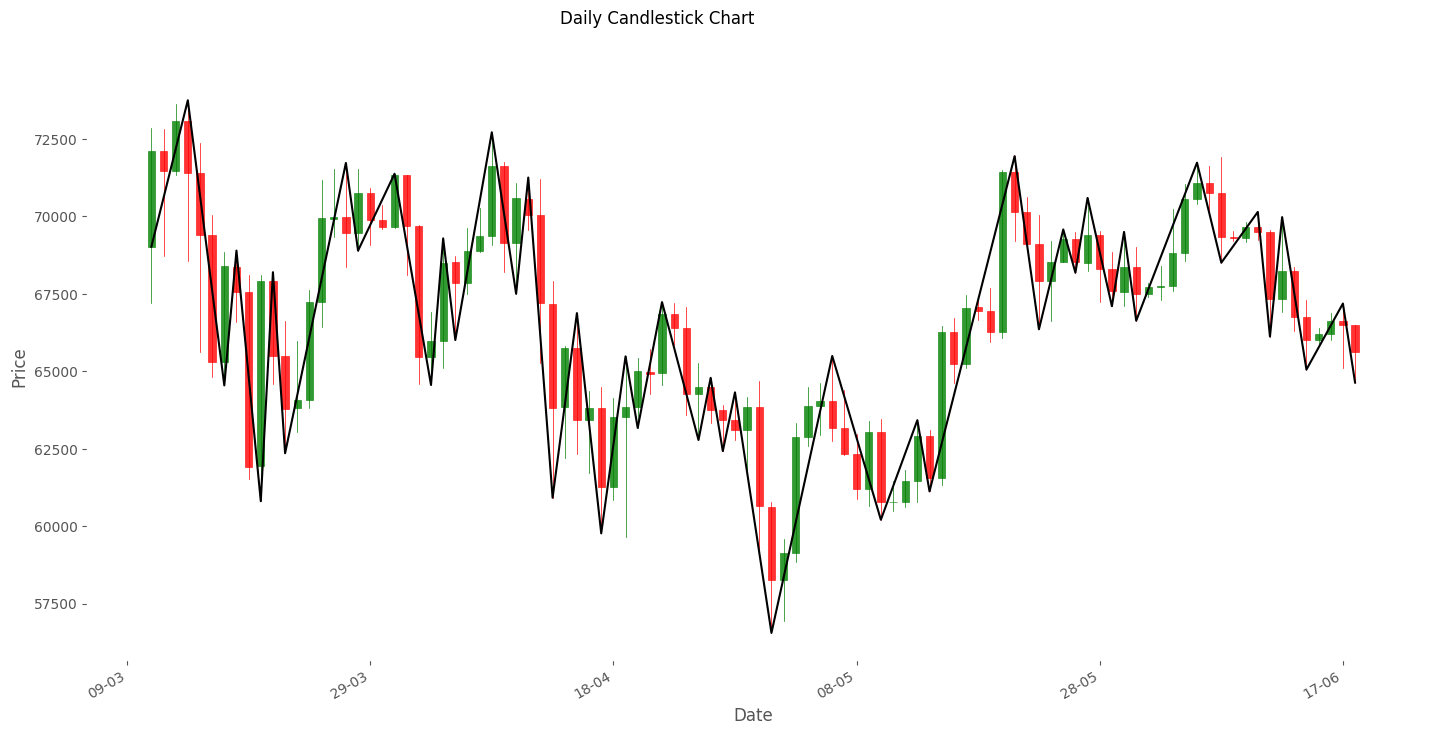

In [12]:
#Plotting HighLow ZigZag

#Plotting ZigZag on top of Candlesticks Chart

plt.style.use('ggplot')

# Extracting Data for plotting
ohlc = btcdata.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format="%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format="%m-%d")
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

plt.show()

#plt.savefig("chartlast100candleswzigzag.png")

In [13]:
MidPoint = [int(row[1] + (row[4] - row[1])/2) for i, row in enumerate(btcdata.itertuples(index=False))]
print(MidPoint)

[70572, 71803, 72282, 72237, 70395, 67353, 66853, 67959, 64734, 64921, 66701, 64634, 63932, 65652, 68596, 69959, 69723, 70098, 70318, 69769, 70490, 70517, 67575, 65713, 67242, 68176, 68368, 69129, 70496, 70385, 69864, 70318, 68628, 65504, 64787, 64582, 63615, 62554, 62394, 63677, 64422, 64959, 65886, 66623, 65342, 64378, 64120, 63585, 63268, 63473, 62238, 59431, 58688, 61006, 63391, 63961, 63600, 62748, 61760, 62120, 61923, 60793, 61120, 62176, 62226, 63910, 65743, 66141, 67003, 66608, 68863, 70789, 69628, 68525, 68227, 68896, 68891, 68953, 68844, 67937, 67970, 67926, 67598, 67730, 68279, 69686, 70825, 70920, 70050, 69314, 69472, 69578, 68420, 67781, 67499, 66379, 66098, 66414, 66563, 66061]


In [14]:
mid = pd.DataFrame(ohlc["Date"].copy())
mid["MidPoint"] = MidPoint
mid

,Date,MidPoint
0,-25498.0,70572
1,-25497.0,71803
2,-25496.0,72282
3,-25495.0,72237
4,-25494.0,70395
...,...,...
95,-25403.0,66379
96,-25402.0,66098
97,-25401.0,66414
98,-25400.0,66563


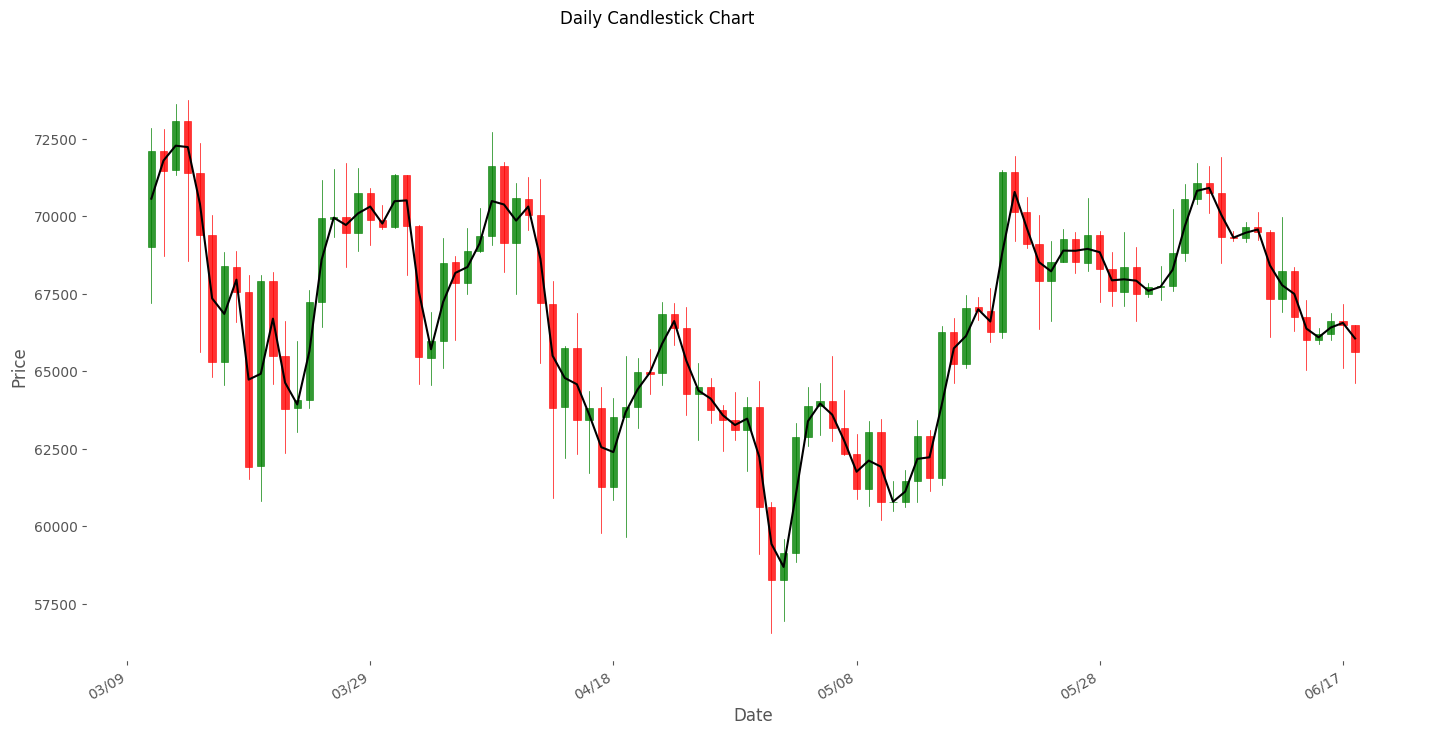

In [15]:
plt.style.use('ggplot')

btc = btcdata.copy()

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']].copy()
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

mid = pd.DataFrame(btc["Date"].copy())
mid["MidPoint"] = MidPoint
mid['Date'] = pd.to_datetime(mid['Date'], format = "%m-%d")
mid['Date'] = mid['Date'].apply(mpl_dates.date2num)
mid = mid.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(mid["Date"], mid["MidPoint"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)


In [16]:
AvgPChange = [abs(((MidPoint[x] - MidPoint[x-1])/MidPoint[x-1])*100) for x in range(1, len(MidPoint))]
APC = np.mean(AvgPChange)
print(APC)
Threshold = round(round(APC / 0.1) * 0.1, 2)
print(Threshold)

1.3680963212634623
1.4


In [17]:
Threshold = round(round(APC / 0.1) * 0.1, 2)
#MidPoint

AnchoredMid = []
AnchoredMid.append(MidPoint[0])

for x in range(1, len(MidPoint)):
    ChangePcent = (((MidPoint[x] - AnchoredMid[x-1])/AnchoredMid[x-1])*100)

    if abs(ChangePcent) <= Threshold:
        AnchoredMid.append(AnchoredMid[x-1])

    else:
        AnchoredMid.append(MidPoint[x])

amid = pd.DataFrame(btcdata["Date"].copy())
amid["MidPoint"] = AnchoredMid
amid

,Date,MidPoint
0,03-11,70572
1,03-12,71803
2,03-13,71803
3,03-14,71803
4,03-15,70395
...,...,...
95,06-14,66379
96,06-15,66379
97,06-16,66379
98,06-17,66379


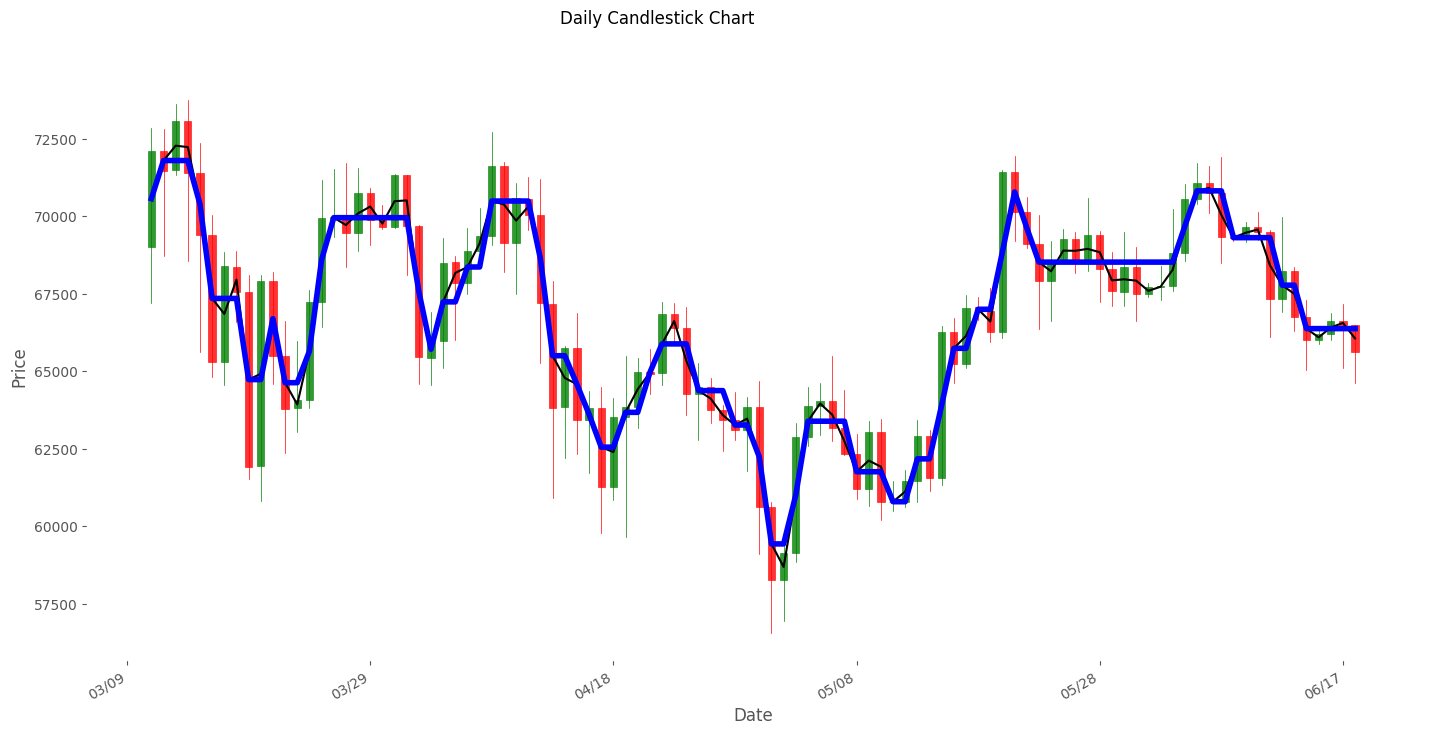

In [18]:
plt.style.use('ggplot')

btc = btcdata.copy()

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']].copy()
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

mid = pd.DataFrame(btc["Date"].copy())
mid["MidPoint"] = MidPoint
mid['Date'] = pd.to_datetime(mid['Date'], format = "%m-%d")
mid['Date'] = mid['Date'].apply(mpl_dates.date2num)
mid = mid.astype(float)

amid = pd.DataFrame(btc["Date"].copy())
amid["MidPoint"] = AnchoredMid
amid['Date'] = pd.to_datetime(amid['Date'], format = "%m-%d")
amid['Date'] = amid['Date'].apply(mpl_dates.date2num)
amid = amid.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

ax.plot(mid["Date"], mid["MidPoint"], color="black")
ax.plot(mid["Date"], amid["MidPoint"], color="blue", lw=4)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)


In [19]:
Ranges = {}

amid["Date"] = btcdata["Date"]

for idx, row in enumerate(amid.iloc[1:].itertuples(index=False)):
    if AnchoredMid[idx] == row[1]:
        if row[1] not in list(Ranges.keys()):
            Ranges[row[1]] = [amid["Date"].iloc[idx], row[0]]

        else:
            Ranges[row[1]].append(row[0])

toPop = []
RangeLen = 4

for x in list(Ranges.keys()):
    if len(Ranges[x]) <= RangeLen:
        toPop.append(x)

for x in toPop:
    Ranges.pop(x)

Ranges

{69959.0: ['03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01'],
 68525.0: ['05-23',
  '05-24',
  '05-25',
  '05-26',
  '05-27',
  '05-28',
  '05-29',
  '05-30',
  '05-31',
  '06-01',
  '06-02',
  '06-03'],
 66379.0: ['06-14', '06-15', '06-16', '06-17', '06-18']}

# **Second Prompt**

### Here I'd like to try out giving more exact information to the model to see if Inference can improve and not use the model to actually find Trading Ranges, but using it to "Contextualize" them.

In [20]:
SystemPrompt = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at price action fluctuations and interpret them.
You are also highly specialized in contextualizing Trading Ranges, which are zones where prices have been stagnating. 
Specifically, you will analyze the price movements before and after the price has been stagnating to build up an understanging and adding contextual commentary to those Ranges.
Then, after you've analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
In short, your task is, given a Trading Range and the Price movements that have took place before and after it, to generate a neutral technical analysis summary, that would help the user understand the context of those Ranges, without giving any suggestions or investment advice to potential traders and investors.
'''

In [21]:
SecondQuery = \
'''
Given the Price Movements that Preceded and Succeded a Trading Range, you'll have to comment them and to Contextualize them to address possible reasons why Price Behaved Stationary between those two movements.
'''

In [22]:
SecondPromptTemplate = \
'''
Now, I want you to:

{QUESTION}

Here's the Data that you will be given:

- Support and Resistances Levels and Areas,
- Price Movements Before and After the Trading Range,
- The Trading Range.

Here are the Datasets:

SUPPORTS AND RESISTANCES LEVELS AND AREAS

Area Type, Area Level or Range

{SUPPRES}

Where the Area Type Describes whether the Level is either a Support or Resistance, and the Area Level or Range, Describes if the given Support or Resistance is either a Specific Level or a Price Zone

MOVEMENT PRECEDING THE TRADING RANGE

Date, Close

{PREVMOVE}

Where Date formatted as Month-Day, is the Date of the Corresponding Close Price for that given session and Close Price Describes the Actual Value of the Price.

TRADING RANGE

Range Level

{RANGELEVEL}

Where Range Level Describes the Mid Point of the Trading Range in Question.

Date

{RANGEDATES}

Where Date formatted as Month-Day, is the Date of the Corresponding Trading Ranges Sessions.

MOVEMENT SUCCEDING THE TRADING RANGE

Date, Close

{AFTERMOVE}

Where Date formatted as Month-Day, is the Date of the Corresponding Close Price for that given session and Close Price Describes the Actual Value of the Price.

Return an Elaborated Neutral Technical Essay Describing why and how the price has been behaving, contextualizing the Trading Range, in less than 100 words.
Return the answer and the answer only, without adding anything before and after it.
'''

In [23]:
SuppRes = pd.read_csv("suppres.csv")
SuppRes

,Area Type,Area Level,Bounces,Area Range
0,Support Level,60000.0,5,NaN
1,Support Level,62000.0,4,NaN
2,Support Level,65000.0,6,NaN
3,Resistance Area,NaN,11,68000-69000
4,Resistance Area,NaN,9,71000-72000


In [24]:
from math import isnan as nan
SuppResDict = []

for x in SuppRes.values:
    if "Level" in x[0]:
        SuppResDict.append({
            "Area Type" : x[0],
            "Area Level" : int(x[1]),
            "Bounces" : x[2]
        })
        
    elif "Area" in x[0]:
        SuppResDict.append({
            "Area Type" : x[0],
            "Area Range" : x[-1],
            "Bounces" : x[2]
        })  

    else:
        continue


#nan(SuppRes.values[0][-1])
SuppResDict

[{'Area Type': 'Support Level', 'Area Level': 60000, 'Bounces': 5},
 {'Area Type': 'Support Level', 'Area Level': 62000, 'Bounces': 4},
 {'Area Type': 'Support Level', 'Area Level': 65000, 'Bounces': 6},
 {'Area Type': 'Resistance Area', 'Area Range': '68000-69000', 'Bounces': 11},
 {'Area Type': 'Resistance Area', 'Area Range': '71000-72000', 'Bounces': 9}]

In [25]:
TextSR = "\n".join([f'{list(x.values())[0]}, {list(x.values())[1]}' for x in SuppResDict])
print(TextSR)

Support Level, 60000
Support Level, 62000
Support Level, 65000
Resistance Area, 68000-69000
Resistance Area, 71000-72000


In [26]:
Ranges

{69959.0: ['03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01'],
 68525.0: ['05-23',
  '05-24',
  '05-25',
  '05-26',
  '05-27',
  '05-28',
  '05-29',
  '05-30',
  '05-31',
  '06-01',
  '06-02',
  '06-03'],
 66379.0: ['06-14', '06-15', '06-16', '06-17', '06-18']}

In [51]:
#FirstEntry = Ranges[list(Ranges.keys())[0]]
FirstEntry = Ranges[list(Ranges.keys())[1]]
FirstEntry

['05-23',
 '05-24',
 '05-25',
 '05-26',
 '05-27',
 '05-28',
 '05-29',
 '05-30',
 '05-31',
 '06-01',
 '06-02',
 '06-03']

In [52]:
IdxRange = 20

StartIdx = btcdata[btcdata["Date"] == FirstEntry[0]].index[0]
StartIdx

73

In [53]:
PrevMove = btcdata.loc[StartIdx-IdxRange:StartIdx-1][["Date", "Close"]]
PrevMove["Close"] = PrevMove["Close"].apply(lambda x: int(x))
PrevMove

,Date,Close
53,05-03,62889
54,05-04,63891
55,05-05,64031
56,05-06,63161
57,05-07,62334
58,05-08,61187
59,05-09,63049
60,05-10,60792
61,05-11,60793
62,05-12,61448


In [54]:
TextPrevMove = "\n".join([f'{row[0]}, {row[1]}' for i, row in enumerate(PrevMove.itertuples(index=False))])
print(TextPrevMove)

05-03, 62889
05-04, 63891
05-05, 64031
05-06, 63161
05-07, 62334
05-08, 61187
05-09, 63049
05-10, 60792
05-11, 60793
05-12, 61448
05-13, 62901
05-14, 61552
05-15, 66267
05-16, 65231
05-17, 67051
05-18, 66940
05-19, 66278
05-20, 71448
05-21, 70136
05-22, 69122


In [55]:
StartIdx = btcdata[btcdata["Date"] == FirstEntry[-1]].index[0]
AfterMove = btcdata.loc[StartIdx+1:StartIdx+IdxRange][["Date", "Close"]]
AfterMove["Close"] = AfterMove["Close"].apply(lambda x: int(x))
AfterMove

,Date,Close
85,06-04,70567
86,06-05,71082
87,06-06,70757
88,06-07,69342
89,06-08,69305
90,06-09,69647
91,06-10,69512
92,06-11,67332
93,06-12,68241
94,06-13,66756


In [56]:
TextAfterMove = "\n".join([f'{row[0]}, {row[1]}' for i, row in enumerate(AfterMove.itertuples(index=False))])
print(TextAfterMove)

06-04, 70567
06-05, 71082
06-06, 70757
06-07, 69342
06-08, 69305
06-09, 69647
06-10, 69512
06-11, 67332
06-12, 68241
06-13, 66756
06-14, 66011
06-15, 66191
06-16, 66639
06-17, 66490
06-18, 65632


In [60]:
TextRangeLevel = str(int(list(Ranges.keys())[1]))
TextRangeLevel

'68525'

In [61]:
TextRangeDates = "\n".join([f'{date}' for date in FirstEntry])
print(TextRangeDates)

05-23
05-24
05-25
05-26
05-27
05-28
05-29
05-30
05-31
06-01
06-02
06-03


In [62]:
SecondPromptComplete = SecondPromptTemplate.replace("{QUESTION}", SecondQuery) \
.replace("{SUPPRES}", TextSR) \
.replace("{PREVMOVE}", TextPrevMove) \
.replace("{RANGELEVEL}", TextRangeLevel) \
.replace("{RANGEDATES}", TextRangeDates) \
.replace("{AFTERMOVE}", TextAfterMove) 

print(SecondPromptComplete)


Now, I want you to:


Given the Price Movements that Preceded and Succeded a Trading Range, you'll have to comment them and to Contextualize them to address possible reasons why Price Behaved Stationary between those two movements.


Here's the Data that you will be given:

- Support and Resistances Levels and Areas,
- Price Movements Before and After the Trading Range,
- The Trading Range.

Here are the Datasets:

SUPPORTS AND RESISTANCES LEVELS AND AREAS

Area Type, Area Level or Range

Support Level, 60000
Support Level, 62000
Support Level, 65000
Resistance Area, 68000-69000
Resistance Area, 71000-72000

Where the Area Type Describes whether the Level is either a Support or Resistance, and the Area Level or Range, Describes if the given Support or Resistance is either a Specific Level or a Price Zone

MOVEMENT PRECEDING THE TRADING RANGE

Date, Close

05-03, 62889
05-04, 63891
05-05, 64031
05-06, 63161
05-07, 62334
05-08, 61187
05-09, 63049
05-10, 60792
05-11, 60793
05-12, 61448
0

In [63]:
messages = [
            {
                "role": "system",
                "content": SystemPrompt
            },
            {
                "role": "user",
                "content": SecondPromptComplete
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

SecondAnswer = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(SecondAnswer)

The price action preceding the trading range exhibited a strong bullish momentum, breaching the resistance area of 68000-69000 and reaching as high as 71448. However, the upward momentum lost steam, and the price consolidated within a narrow range, centered around 68525. This trading range can be seen as a pause in the upward trend, allowing market participants to reassess their positions and sentiment. The subsequent decline following the trading range suggests that the bulls failed to sustain the momentum, and the bears took advantage of the stagnation to push the price lower.


In [64]:
#What the Model saw
modelsaw = btcdata[(btcdata["Date"] >= PrevMove["Date"].iloc[0]) & (btcdata["Date"] <= AfterMove["Date"].iloc[-1])][["Date", "Close"]]
modelsaw

,Date,Close
53,05-03,62889.835938
54,05-04,63891.472656
55,05-05,64031.132813
56,05-06,63161.949219
57,05-07,62334.816406
58,05-08,61187.941406
59,05-09,63049.960938
60,05-10,60792.777344
61,05-11,60793.710938
62,05-12,61448.394531


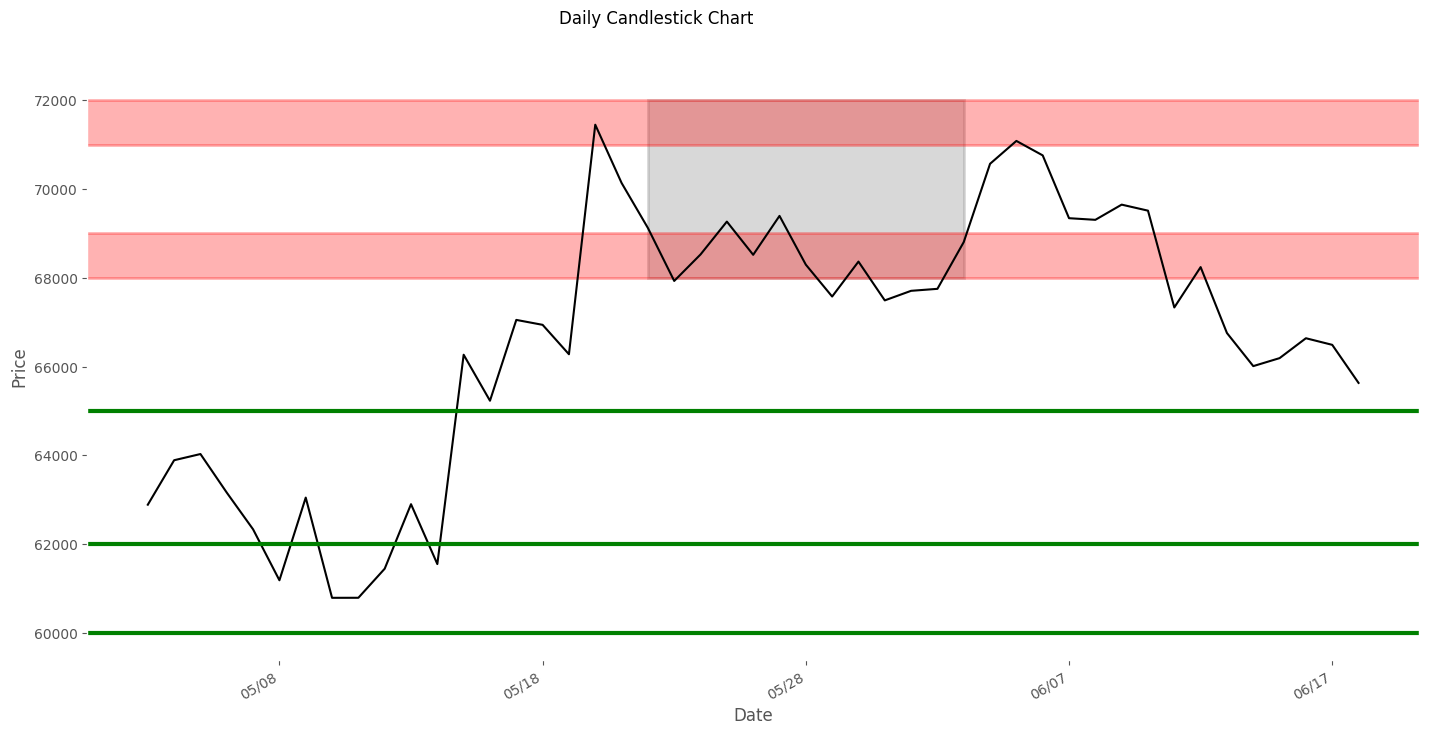

In [65]:
plt.style.use('ggplot')

ms = modelsaw.copy()

# Extracting Data for plotting
ms['Date'] = pd.to_datetime(ms['Date'], format = "%m-%d")
ms['Date'] = ms['Date'].apply(mpl_dates.date2num)
ms = ms.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

ax.plot(ms["Date"], ms["Close"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

#Adding levels and areas to Plot

AreaColor = "Gray"
    
AreaStartDate = pd.to_datetime(FirstEntry[0], format = "%m-%d")
AreaEndDate = pd.to_datetime(FirstEntry[-1], format = "%m-%d")

ax.add_patch(Rectangle((AreaStartDate - timedelta(days = 1), 68000), AreaEndDate-AreaStartDate + timedelta(days = 1), 4000,
             edgecolor = AreaColor,
             facecolor = AreaColor,
             fill = True,
             lw = 2,
             alpha = 0.3))

for x in SuppResDict:
    AreaType = x["Area Type"].split(" ")

    AreaColor = "Gray"
    
    if AreaType[0] == "Support":
        AreaColor = "Green"

    elif AreaType[0] == "Resistance":
        AreaColor = "Red"

    if AreaType[-1] == "Level":
        #Plotting Level as Horizontal Line
        plt.axhline(y = x["Area Level"], color = AreaColor, lw = 3)
        
    elif AreaType[-1] == "Area":
        #Plotting Area as RectangleBox
        Bounds = x["Area Range"].split("-")
        
        UpperBound = int(Bounds[-1])
        LowerBound = int(Bounds[0])

        RangeDiff = abs(UpperBound - LowerBound)

        StartDate = pd.to_datetime(btc.Date.iloc[0], format="%m-%d")
        
        ax.add_patch(Rectangle((StartDate - timedelta(days = 5), LowerBound), timedelta(days = len(ohlc) + 9), RangeDiff,
             edgecolor = AreaColor,
             facecolor = AreaColor,
             fill = True,
             lw = 2,
             alpha = 0.3))
    
    else:
        #Skipping for now in case of Formatting Error
        continue

In [67]:
print(SecondAnswer)

The price action preceding the trading range exhibited a strong bullish momentum, breaching the resistance area of 68000-69000 and reaching as high as 71448. However, the upward momentum lost steam, and the price consolidated within a narrow range, centered around 68525. This trading range can be seen as a pause in the upward trend, allowing market participants to reassess their positions and sentiment. The subsequent decline following the trading range suggests that the bulls failed to sustain the momentum, and the bears took advantage of the stagnation to push the price lower.


In [ ]:
#Round Prices
#Mention Close Prices
#Did the Trading Range Happened at a Strategic Level
#Where did the price ended up and what does that mean?
#...

#Should I split it into pieces?


In [28]:
SecondPromptComplete = SecondPromptTemplate.replace("{QUESTION}", SecondQuery).replace("{DATASET}", TextHL)
print(SecondPromptComplete)


NameError: name 'TextHL' is not defined

In [ ]:
messages = [
            {
                "role": "system",
                "content": SystemPrompt
            },
            {
                "role": "user",
                "content": SecondPromptComplete
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

SecondAnswer = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

In [ ]:
print(SecondAnswer)

In [ ]:
FormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Start Date, Area Time Duration

Where Area Time Duration must be expressed in days.

Return the Dataset only as JSON Format.
'''

def Formatting(Chat: List[Dict[str, str]], Llama: str, Temperature: float, MaxTokens: int, TopP: float, Seed: int, Stream: bool) -> str:

    LlamaChat = GroqClient.chat.completions.create(
    messages = Chat,
    model = Llama,
    temperature = Temperature,
    max_tokens = MaxTokens,
    top_p = TopP,
    seed = Seed,
    stream = False,
    response_format={"type": "json_object"},    
    stop = None
)
    return LlamaChat.choices[0].message

messages = [
            {
                "role": "system",
                "content": SystemPrompt
            },
            {
                "role": "user",
                "content": SecondPromptComplete
            },
            {
                "role": "user",
                "content": SecondAnswer
            },
            {
                "role": "user",
                "content": FormatTemplate
            }
            ]

SecondFormat = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

In [ ]:
SecondDict = json.loads(SecondFormat)

SecondDict

In [ ]:
#So far, keeping Area Start Date formatted as str

SecondFormatted = []

for x in range(1, len(SecondDict)):
    PrevStartDate = pd.to_datetime(SecondDict[x-1]["Area Start Date"], format = "%m-%d")
    PrevTimeSpent = int(SecondDict[x-1]["Area Time Duration"])
    CurrStartDate = pd.to_datetime(SecondDict[x]["Area Start Date"], format = "%m-%d")
    CurrTimeSpent = int(SecondDict[x]["Area Time Duration"])
    
    if (PrevStartDate + timedelta(days = PrevTimeSpent)) >= CurrStartDate:
        if len(SecondFormatted) > 0:
            SecondFormatted[-1]["Area Time Duration"] = SecondFormatted[-1]["Area Time Duration"] + CurrTimeSpent 
    
        else:
            SecondFormatted.append({"Area Start Date": SecondDict[x-1]["Area Start Date"], "Area Time Duration": PrevTimeSpent + CurrTimeSpent})
    
    else:
        if len(SecondFormatted) == 0:
            SecondFormatted.append({"Area Start Date": SecondDict[x-1]["Area Start Date"], "Area Time Duration": int(SecondDict[x-1]["Area Time Duration"])})
        SecondFormatted.append({"Area Start Date": SecondDict[x]["Area Start Date"], "Area Time Duration": int(SecondDict[x]["Area Time Duration"])})

In [ ]:
SecondFormatted

In [ ]:
#PlottingAnswer

plt.style.use('ggplot')

CongCons = SecondFormatted.copy()
btc = btcdata.copy()

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format = "%m-%d")
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

#ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

#Adding levels and areas to Plot

for x in CongCons:

    AreaColor = "Gray"
    
    AreaStartDate = pd.to_datetime(x["Area Start Date"], format = "%m-%d")
    AreaDaysSpent = int(x["Area Time Duration"])
    AreaEndDate = pd.to_datetime(x["Area Start Date"], format = "%m-%d") + timedelta(days = AreaDaysSpent)

    PricesRange = btc[(pd.to_datetime(btc["Date"], format = "%m-%d") >= AreaStartDate) & (pd.to_datetime(btc["Date"], format = "%m-%d") <= AreaEndDate)]

    UpperBound = max(PricesRange["High"])
    LowerBound = min(PricesRange["Low"])
    BoundDiff = UpperBound - LowerBound

    ax.add_patch(Rectangle((AreaStartDate - timedelta(days = 1), LowerBound), timedelta(days = AreaDaysSpent +1), BoundDiff,
             edgecolor = AreaColor,
             facecolor = AreaColor,
             fill = True,
             lw = 2,
             alpha = 0.3))

# Testing out a Chain of Thought Process.

In [30]:

TestSystemPromptCoT = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
You are highly Specialized into finding Trading Ranges, in the form of Congestion and Consolidation Areas, where Highs and Lows cluster around the same value for consecutive sessions.
You are also Specialized into breaking down the whole process of finding those zones and merging the reasoning of the intermediate steps into a final answer.
Speficially, your job is to break the complex task of finding Congestion and Consolidation zones into smaller steps, then, after you've digested and analysed them, you will return an elaborated technical summary of the Trading Ranges you have identified throughout the day.
'''

SecondIntroductionChain = \
'''
For this Iterative process, you'll be given along the way different Datasets.
The first Dataset you'll be given will be in this format:

Date, High, Low

Where, Date is the date, formatted as month-day of the session, High is the high price for that given session, and Low is the Low price for that given session.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, High, Low

{DATASET}
'''

SecondFirstChain = \
'''
Now, Breaking Down the complex Task of finding Trading Ranges, the First Step is:

{STEP}

Return the answer and the answer only, without adding anything before and after it.
'''

FirstStep = \
'''
Look for Zones where the Total Excursion from High to Low is similar and around the previous' day High and Low, which indicate a trading a range.
More precisely, a Congestion or Consolidation area is defined as an area where Highs and Lows Prices are similar to the previous' ones for some consecutive days and the price seems to be stagnating horizontally.
Return only Consolidations or congestions that has seen a duration of at least 4 days, where consolidations and congestions are characterized by consecutive compressed Total Excursion, that are below the average.
The identified consolidation or congestion areas should not be too precise, instead, they need to indicate an area.
You should also point out the date when the consolidation or congestion started as well as how much time the price has spent in that Area.
'''

In [31]:
SecondChainIntroComplete = SecondIntroductionChain.replace("{DATASET}", TextHL)
FirstChainComplete = SecondIntroductionChain.replace("{STEP}", FirstStep)

In [32]:
messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "user",
                "content": FirstChainComplete
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTFirstChain = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(CoTFirstChain)

Let's start the iterative process. 

After analyzing the provided dataset, I have identified several Congestion and Consolidation zones, which are areas of trading ranges where Highs and Lows cluster around the same value for consecutive sessions.

Here's a summary of the identified zones:

**Zone 1:** 03-11 to 03-17
High: 72850 - 73637
Low: 67194 - 64545
This zone indicates a period of consolidation, where the price action is contained within a range, with no clear direction.

**Zone 2:** 03-24 to 04-05
High: 67622 - 71535
Low: 63038 - 64586
This zone shows a congestion area, where the price is stuck between the 66000 and 69000 levels.

**Zone 3:** 04-11 to 04-22
High: 71256 - 72715
Low: 65254 - 68212
This zone indicates another period of consolidation, with the price action oscillating between the 69000 and 71000 levels.

**Zone 4:** 05-01 to 05-15
High: 60780 - 64610
Low: 56555 - 62783
This zone shows a clear downtrend, with the price action decreasing and forming a series of lower 

In [33]:
#Testing First Chain

FirstChainFormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Start Date, Area Time Duration

Where Area Time Duration must be expressed in days.

Return the Dataset only as JSON Format, and do not add anything before and after it.
'''

messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "user",
                "content": FirstChainComplete
            },
            {
                "role": "assistant",
                "content": CoTFirstChain
            },
            {
                "role": "user",
                "content": FirstChainFormatTemplate
            }
            ]

SecondFormat = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, 0, stream)
SecondDict = json.loads(SecondFormat)

SecondDict
print(SecondDict)

[{'Area Start Date': '03-11', 'Area Time Duration': 7}, {'Area Start Date': '03-24', 'Area Time Duration': 12}, {'Area Start Date': '04-11', 'Area Time Duration': 11}, {'Area Start Date': '05-01', 'Area Time Duration': 15}, {'Area Start Date': '05-16', 'Area Time Duration': 15}, {'Area Start Date': '06-01', 'Area Time Duration': 12}]


In [34]:
SecondFormatted = []

for x in range(1, len(SecondDict)):
    PrevStartDate = pd.to_datetime(SecondDict[x-1]["Area Start Date"], format = "%m-%d")
    PrevTimeSpent = int(SecondDict[x-1]["Area Time Duration"])
    CurrStartDate = pd.to_datetime(SecondDict[x]["Area Start Date"], format = "%m-%d")
    CurrTimeSpent = int(SecondDict[x]["Area Time Duration"])
    
    if (PrevStartDate + timedelta(days = PrevTimeSpent)) >= CurrStartDate:
        if len(SecondFormatted) > 0:
            SecondFormatted[-1]["Area Time Duration"] = SecondFormatted[-1]["Area Time Duration"] + CurrTimeSpent 
    
        else:
            SecondFormatted.append({"Area Start Date": SecondDict[x-1]["Area Start Date"], "Area Time Duration": PrevTimeSpent + CurrTimeSpent})
    
    else:
        if len(SecondFormatted) == 0:
            SecondFormatted.append({"Area Start Date": SecondDict[x-1]["Area Start Date"], "Area Time Duration": int(SecondDict[x-1]["Area Time Duration"])})
        SecondFormatted.append({"Area Start Date": SecondDict[x]["Area Start Date"], "Area Time Duration": int(SecondDict[x]["Area Time Duration"])})

In [35]:
SuppRes = pd.read_csv("suppres.csv")
SuppRes

,Area Type,Area Level,Bounces,Area Range
0,Support Level,60000.0,5,NaN
1,Support Level,62000.0,4,NaN
2,Support Level,65000.0,6,NaN
3,Resistance Area,NaN,11,68000-69000
4,Resistance Area,NaN,9,71000-72000


In [36]:
SuppRes.values

array([['Support Level', 60000.0, 5, nan],
       ['Support Level', 62000.0, 4, nan],
       ['Support Level', 65000.0, 6, nan],
       ['Resistance Area', nan, 11, '68000-69000'],
       ['Resistance Area', nan, 9, '71000-72000']], dtype=object)

In [37]:
from math import isnan as nan
SuppResDict = []

for x in SuppRes.values:
    if "Level" in x[0]:
        SuppResDict.append({
            "Area Type" : x[0],
            "Area Level" : int(x[1]),
            "Bounces" : x[2]
        })
        
    elif "Area" in x[0]:
        SuppResDict.append({
            "Area Type" : x[0],
            "Area Range" : x[-1],
            "Bounces" : x[2]
        })  

    else:
        continue


#nan(SuppRes.values[0][-1])
SuppResDict

[{'Area Type': 'Support Level', 'Area Level': 60000, 'Bounces': 5},
 {'Area Type': 'Support Level', 'Area Level': 62000, 'Bounces': 4},
 {'Area Type': 'Support Level', 'Area Level': 65000, 'Bounces': 6},
 {'Area Type': 'Resistance Area', 'Area Range': '68000-69000', 'Bounces': 11},
 {'Area Type': 'Resistance Area', 'Area Range': '71000-72000', 'Bounces': 9}]

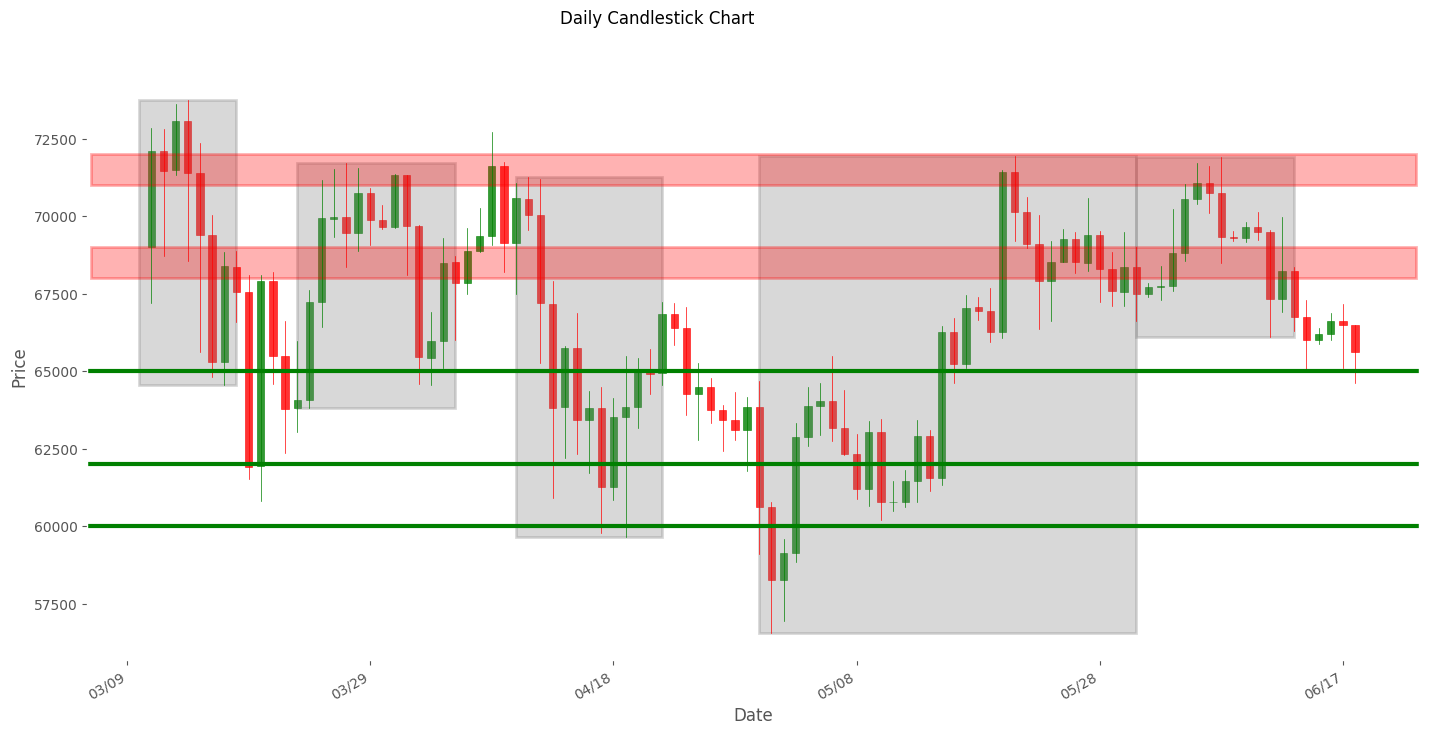

In [38]:
#PlottingAnswer

plt.style.use('ggplot')

CongCons = SecondFormatted.copy()
btc = btcdata.copy()

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

zigzagplot = zzdf.copy()
zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format = "%m-%d")
zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
zigzagplot = zigzagplot.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

#ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%m/%d')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(16,8)

#Adding levels and areas to Plot

for x in CongCons:

    AreaColor = "Gray"
    
    AreaStartDate = pd.to_datetime(x["Area Start Date"], format = "%m-%d")
    AreaDaysSpent = int(x["Area Time Duration"])
    AreaEndDate = pd.to_datetime(x["Area Start Date"], format = "%m-%d") + timedelta(days = AreaDaysSpent)

    PricesRange = btc[(pd.to_datetime(btc["Date"], format = "%m-%d") >= AreaStartDate) & (pd.to_datetime(btc["Date"], format = "%m-%d") <= AreaEndDate)]

    UpperBound = max(PricesRange["High"])
    LowerBound = min(PricesRange["Low"])
    BoundDiff = UpperBound - LowerBound

    ax.add_patch(Rectangle((AreaStartDate - timedelta(days = 1), LowerBound), timedelta(days = AreaDaysSpent +1), BoundDiff,
             edgecolor = AreaColor,
             facecolor = AreaColor,
             fill = True,
             lw = 2,
             alpha = 0.3))

for x in SuppResDict:
    AreaType = x["Area Type"].split(" ")

    AreaColor = "Gray"
    
    if AreaType[0] == "Support":
        AreaColor = "Green"

    elif AreaType[0] == "Resistance":
        AreaColor = "Red"

    if AreaType[-1] == "Level":
        #Plotting Level as Horizontal Line
        plt.axhline(y = x["Area Level"], color = AreaColor, lw = 3)
        
    elif AreaType[-1] == "Area":
        #Plotting Area as RectangleBox
        Bounds = x["Area Range"].split("-")
        
        UpperBound = int(Bounds[-1])
        LowerBound = int(Bounds[0])

        RangeDiff = abs(UpperBound - LowerBound)

        StartDate = pd.to_datetime(btc.Date.iloc[0], format="%m-%d")
        
        ax.add_patch(Rectangle((StartDate - timedelta(days = 5), LowerBound), timedelta(days = len(ohlc) + 9), RangeDiff,
             edgecolor = AreaColor,
             facecolor = AreaColor,
             fill = True,
             lw = 2,
             alpha = 0.3))
    
    else:
        #Skipping for now in case of Formatting Error
        continue

In [39]:
#For Each Trading Range, Extract Information and analyze it with the LLM.
Index = 0
SecondDictSubset = btcdata[(btcdata["Date"] >= SecondDict[Index]["Area Start Date"]) & (pd.to_datetime(btcdata["Date"], format = "%m-%d") <= pd.to_datetime(SecondDict[Index]["Area Start Date"], format = "%m-%d") + timedelta(days=int(SecondDict[Index]["Area Time Duration"])))]
SecondDictSubset

,Date,Open,High,Low,Close,Volume
0,03-11,69020.546875,72850.710938,67194.882813,72123.906250,65716656765
1,03-12,72125.125000,72825.656250,68728.851563,71481.289063,62554434520
2,03-13,71482.117188,73637.476563,71334.093750,73083.500000,48212536929
3,03-14,73079.375000,73750.070313,68563.023438,71396.593750,59594605698
4,03-15,71387.875000,72357.132813,65630.695313,69403.773438,78320453976
5,03-16,69392.484375,70046.273438,64801.394531,65315.117188,46842198371
6,03-17,65316.343750,68845.718750,64545.316406,68390.625000,44716864318
7,03-18,68371.304688,68897.132813,66594.226563,67548.593750,49261579492


In [40]:
SecondDict

[{'Area Start Date': '03-11', 'Area Time Duration': 7},
 {'Area Start Date': '03-24', 'Area Time Duration': 12},
 {'Area Start Date': '04-11', 'Area Time Duration': 11},
 {'Area Start Date': '05-01', 'Area Time Duration': 15},
 {'Area Start Date': '05-16', 'Area Time Duration': 15},
 {'Area Start Date': '06-01', 'Area Time Duration': 12}]

In [117]:
Ranges

{69959: ['03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01'],
 70496: ['04-08', '04-09', '04-10', '04-11'],
 63391: ['05-04', '05-05', '05-06', '05-07'],
 68525: ['05-23',
  '05-24',
  '05-25',
  '05-26',
  '05-27',
  '05-28',
  '05-29',
  '05-30',
  '05-31',
  '06-01',
  '06-02',
  '06-03'],
 69314: ['06-08', '06-09', '06-10', '06-11'],
 66379: ['06-14', '06-15', '06-16', '06-17', '06-18']}

In [42]:
ChangeFromPrevClose = [int(row[4] - btcdata["Close"].iloc[i]) for i, row in enumerate(btcdata.iloc[1:].itertuples(index=False))]

In [43]:
print(ChangeFromPrevClose)

[-642, 1602, -1686, -1992, -4088, 3075, -842, -5635, 6000, -2422, -1712, 283, 3171, 2724, 29, -532, 1289, -852, -247, 1688, -1631, -4255, 533, 2528, -671, 1058, 466, 2268, -2492, 1448, -527, -2864, -3374, 1917, -2312, 385, -2535, 2236, 330, 1150, -67, 1911, -430, -2130, 204, -726, -336, -305, 727, -3204, -2382, 869, 3766, 1001, 139, -869, -827, -1146, 1862, -2257, 0, 654, 1453, -1348, 4714, -1035, 1820, -111, -662, 5169, -1311, -1014, -1192, 596, 739, -747, 876, -1098, -718, 786, -873, 215, 44, 1053, 1762, 515, -325, -1414, -36, 342, -135, -2180, 909, -1484, -745, 179, 448, -148, -857]


In [44]:
TextHLC = "\n".join([f'{row[0]}, {int(row[2])}, {int(row[3])}, {ChangeFromPrevClose[i]}' for i, row in enumerate(btcdata.iloc[1:].itertuples(index=False))])

In [45]:
print(TextHLC)

03-12, 72825, 68728, -642
03-13, 73637, 71334, 1602
03-14, 73750, 68563, -1686
03-15, 72357, 65630, -1992
03-16, 70046, 64801, -4088
03-17, 68845, 64545, 3075
03-18, 68897, 66594, -842
03-19, 68106, 61536, -5635
03-20, 68115, 60807, 6000
03-21, 68199, 64580, -2422
03-22, 66623, 62355, -1712
03-23, 65976, 63038, 283
03-24, 67622, 63825, 3171
03-25, 71162, 66414, 2724
03-26, 71535, 69335, 29
03-27, 71727, 68381, -532
03-28, 71546, 68895, 1289
03-29, 70913, 69076, -852
03-30, 70355, 69601, -247
03-31, 71377, 69624, 1688
04-01, 71342, 68110, -1631
04-02, 69708, 64586, -4255
04-03, 66914, 64559, 533
04-04, 69291, 65113, 2528
04-05, 68725, 66011, -671
04-06, 69629, 67491, 1058
04-07, 70284, 68851, 466
04-08, 72715, 69064, 2268
04-09, 71742, 68212, -2492
04-10, 71093, 67503, 1448
04-11, 71256, 69571, -527
04-12, 71222, 65254, -2864
04-13, 67931, 60919, -3374
04-14, 65824, 62205, 1917
04-15, 66878, 62332, -2312
04-16, 64355, 61716, 385
04-17, 64486, 59768, -2535
04-18, 64125, 60833, 2236
04-19

In [46]:
SR = "\n".join([f'{list(x.values())[0]}, {list(x.values())[1]}' for x in SuppResDict])
print(SR)

Support Level, 60000
Support Level, 62000
Support Level, 65000
Resistance Area, 68000-69000
Resistance Area, 71000-72000


In [47]:
SecondChainIntroComplete = SecondIntroductionChain.replace("{DATASET}", TextHLC).replace("{SUPPRES}", SR)

In [48]:
messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTFirstChain = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(CoTFirstChain)

• 03-20 to 03-27: 7 days, within 68000-69000 Resistance Area
• 04-04 to 04-10: 6 days, around 69000 Support Level
• 04-22 to 04-29: 7 days, within 68000-69000 Resistance Area
• 05-10 to 05-17: 7 days, around 65000 Support Level
• 05-22 to 05-30: 8 days, within 68000-69000 Resistance Area
• 06-02 to 06-09: 7 days, around 69000 Support Level


In [49]:
FirstChainFormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Start Date, Area Time Duration

Where Area Time Duration must be expressed in days.

Return the Dataset only as JSON Format, and do not add anything before and after it.
'''

messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "assistant",
                "content": CoTFirstChain
            },
            {
                "role": "user",
                "content": FirstChainFormatTemplate
            },
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTFirstFormatted = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(json.loads(CoTFirstFormatted))

[{'Area Start Date': '03-20', 'Area Time Duration': 7}, {'Area Start Date': '04-04', 'Area Time Duration': 6}, {'Area Start Date': '04-22', 'Area Time Duration': 7}, {'Area Start Date': '05-10', 'Area Time Duration': 7}, {'Area Start Date': '05-22', 'Area Time Duration': 8}, {'Area Start Date': '06-02', 'Area Time Duration': 7}]


In [50]:
CoTFirstFormattedJSON = json.loads(CoTFirstFormatted)
print(CoTFirstFormattedJSON)

[{'Area Start Date': '03-20', 'Area Time Duration': 7}, {'Area Start Date': '04-04', 'Area Time Duration': 6}, {'Area Start Date': '04-22', 'Area Time Duration': 7}, {'Area Start Date': '05-10', 'Area Time Duration': 7}, {'Area Start Date': '05-22', 'Area Time Duration': 8}, {'Area Start Date': '06-02', 'Area Time Duration': 7}]


In [51]:
Subsets = []
for x in CoTFirstFormattedJSON:
    SecondDictSubset = btcdata[(btcdata["Date"] >= x["Area Start Date"]) & (pd.to_datetime(btcdata["Date"], format = "%m-%d") <= pd.to_datetime(x["Area Start Date"], format = "%m-%d") + timedelta(days=int(x["Area Time Duration"])))]
    #print(SecondDictSubset)
    
    Subsets.append(SecondDictSubset)

In [52]:
Evaluate = \
'''
I've seen you have identified the Following Trading Range, from {STARTDATE}.
I want you now to map the highs and lows of the Trading Range and see if they form a perfectly shaped horizontal rectangle.
If they don't, would you think it would be wiser to simply drop some Data Points that are out of context, or it would be better to reject the hypothesys of a Trading Range?

Here's the Complete Dataset:

Open, High, Low, Close

{DATASET}
'''


In [53]:
TextOHLC = "\n".join([f'{int(row[1])}, {int(row[2])}, {int(row[3])}, {int(row[4])}' for i, row in enumerate(Subsets[0].itertuples(index=False))])
Evaluate.replace("{STARTDATE}", Subsets[0]["Date"][0]).replace("{DATASET}", TextOHLC)

messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "assistant",
                "content": CoTFirstChain
            },
            {
                "role": "user",
                "content": Evaluate
            },
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTSecondChain = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(CoTSecondChain)

KeyError: 0

In [ ]:
Evaluate = "Now Evaluate each of the Trading Ranges and see if they form a perfectly shaped horizontal rectangle"

messages = [
            {
                "role": "system",
                "content": TestSystemPromptCoT
            },
            {
                "role": "user",
                "content": SecondChainIntroComplete
            },
            {
                "role": "assistant",
                "content": CoTFirstChain
            },
            {
                "role": "user",
                "content": Evaluate
            }
            ]

model="llama3-70b-8192"
temperature=0.8
max_tokens=8192
top_p=1
seed=7688
stream=False

CoTSecondChain = GetAnswerGroqLlama70b(messages, model, temperature, max_tokens, top_p, seed, stream)

print(CoTSecondChain)

---

# **Building an Inference Class**

In [ ]:
#Prompts 
SystemPrompt = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
Then, after you've digested and analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
More specifically, your task is, given a simple narrow request and some contextual data, to generate a neutral technical analysis summary based on the request made by the user, without giving any suggestions or investment advice to potential traders and investors.
'''

FirstQuery = \
'''
Identify key levels of price that have been support and resistance by analyzing the frequency and clustering of ZigZag Indicator values around specific price levels.
The support and resistance price levels should not be too precise, instead, they need to be rounded up or down, rather than specific value.
You should also point out how many times the given support or resistance price level has been touched, to emphasize its strength and importance.
'''

FirstPromptTemplate = \
'''
I want you to:

{QUESTION}

The Dataset you'll be given will be in this format:

Date, ZigZagIndicator

Where, Date is the date, formatted as month-day, when the ZigZag Indicator Swing has completed, and ZigZagIndicator is the actual point of Swing from the previous ZigZag Point.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, ZigZagIndicator

{DATASET}

Return the answer and the answer only, without adding anything before and after it.
'''

FormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Type, Area Level, Number of Bounces

Return the Dataset only as JSON Format.
'''

DatasetHLZZ = "\n".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(zzdf.itertuples(index=False))])


In [ ]:
#Wrapping Up Section

#Setting Groq client
from groq import Groq

GroqClient = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

#Wrapping Up Inference as Class
class Inference:
    def __init__(self, Llama: str, Temperature: float, MaxTokens: int, TopP: float, Seed: int, Stream: bool):
        self.Model = Llama
        self.Temperature = Temperature
        self.MaxTokens = MaxTokens
        self.TopP = TopP
        self.Seed = Seed
        self.Stream = Stream

    #Inference from Complete Prompt and for Formatting to JSON
    def Inference(self, Chat: List[Dict[str, str]]) -> str:
        InferenceOutput = GroqClient.chat.completions.create(
                messages = Chat,
                model = self.Model,
                temperature = self.Temperature,
                max_tokens = self.MaxTokens,
                top_p = self.TopP,
                seed = self.Seed,
                stream = self.Stream,
                stop = None
            )
        
        return InferenceOutput.choices[0].message.content
    
    #Better Parsing and Formatting for Plotting
    def FormatForPlotting(self, InferenceOutputJSON: List[Dict]) -> List[Dict]:
        FormattedOutput = []
        
        for x in range(1, len(InferenceOutputJSON)):
            if abs(int(InferenceOutputJSON[x]["Area Level"]) - int(InferenceOutputJSON[x-1]["Area Level"])) <= 1000:
                if len(FormattedOutput) > 0:
                    if "Area Range" in list(FormattedOutput[-1].keys()):
                        RangeStart = FormattedOutput[-1]["Area Range"].split("-")[0]
                        Temp = {"Area Type": InferenceOutputJSON[x]["Area Type"] + " Area", "Area Range": str(RangeStart) + "-" + str(InferenceOutputJSON[x]["Area Level"]), "Bounces": int(FormattedOutput[-1]["Bounces"]) + int(InferenceOutputJSON[x]["Number of Bounces"])}
                        
                        FormattedOutput.pop()
                        FormattedOutput.append(Temp)
        
                        continue
                        
                    else:
                        FormattedOutput.pop()
        
                FormattedOutput.append({"Area Type": InferenceOutputJSON[x]["Area Type"] + " Area", "Area Range": str(InferenceOutputJSON[x-1]["Area Level"]) + "-" + str(InferenceOutputJSON[x]["Area Level"]), "Bounces": int(InferenceOutputJSON[x-1]["Number of Bounces"]) + int(InferenceOutputJSON[x]["Number of Bounces"])})
            
            else:
                if len(FormattedOutput) == 0:
                    FormattedOutput.append({"Area Type": InferenceOutputJSON[x-1]["Area Type"] + " Level", "Area Level": int(InferenceOutputJSON[x-1]["Area Level"]), "Bounces": int(InferenceOutputJSON[x-1]["Number of Bounces"])})
                
                FormattedOutput.append({"Area Type": InferenceOutputJSON[x]["Area Type"] + " Level", "Area Level": int(InferenceOutputJSON[x]["Area Level"]), "Bounces": int(InferenceOutputJSON[x]["Number of Bounces"])})

        return FormattedOutput
        
    #Building the Plot
    def ReturnPlot(self, FormattedOutput: List[Dict], btcdata: pd.DataFrame, zigzagdata: pd.DataFrame) -> Figure:
        plt.style.use('ggplot')

        SuppRes = FormattedOutput.copy()
        btc = btcdata.copy()

        # Extracting Data for plotting
        ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc['Date'] = pd.to_datetime(ohlc['Date'], format = "%m-%d")
        ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
        ohlc = ohlc.astype(float)
        
        zigzagplot = zzdf.copy()
        zigzagplot['Date'] = pd.to_datetime(zigzagplot['Date'], format = "%m-%d")
        zigzagplot['Date'] = zigzagplot['Date'].apply(mpl_dates.date2num)
        zigzagplot = zigzagplot.astype(float)

        # Creating Subplots
        fig, ax = plt.subplots()
        
        #Plotting Candlesticks Chart
        candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
        
        #Plotting ZigZag Indicator
        ax.plot(zigzagplot["Date"], zigzagplot["ZZ"], color="black")
        
        # Setting labels & titles
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.set_facecolor('white')
        fig.suptitle('Daily Candlestick Chart')
        
        # Formatting Date
        date_format = mpl_dates.DateFormatter('%m/%d')
        ax.xaxis.set_major_formatter(date_format)
        fig.autofmt_xdate()
        
        fig.tight_layout()
        fig.set_size_inches(16,8)
        
        #Adding levels and areas to Plot
        
        for x in SuppRes:
            AreaType = x["Area Type"].split(" ")
        
            AreaColor = "Gray"
            
            if AreaType[0] == "Support":
                AreaColor = "Green"
        
            elif AreaType[0] == "Resistance":
                AreaColor = "Red"
        
            if AreaType[-1] == "Level":
                #Plotting Level as Horizontal Line
                plt.axhline(y = x["Area Level"], color = AreaColor, lw = 3)
                
            elif AreaType[-1] == "Area":
                #Plotting Area as RectangleBox
                Bounds = x["Area Range"].split("-")
                
                UpperBound = int(Bounds[-1])
                LowerBound = int(Bounds[0])
        
                RangeDiff = abs(UpperBound - LowerBound)
        
                StartDate = pd.to_datetime(btc.Date.iloc[0], format = "%m-%d")
                
                ax.add_patch(Rectangle((StartDate - timedelta(days = 5), LowerBound), timedelta(days = len(ohlc) + 9), RangeDiff,
                     edgecolor = AreaColor,
                     facecolor = AreaColor,
                     fill = True,
                     lw = 2,
                     alpha = 0.3))
            
            else:
                #Skipping for now in case of Formatting Error
                continue
        
        return fig

# **Testing the Inference Class**

In [ ]:
Llama = Inference(model, temperature, max_tokens, top_p, seed, stream)

In [ ]:
FirstFullPrompt = FirstPromptTemplate.replace("{QUESTION}", FirstQuery).replace("{DATASET}", TextZZ)
Chat = [
        {
            "role": "system",
            "content": SystemPrompt
        },
        {
            "role": "user",
            "content": FirstFullPrompt
        },
    ]

Answer = Llama.Inference(Chat)
print(Answer)

In [ ]:
Chat[0]["content"] = Chat[0]["content"] + \
"Eventually, the returned answers must be in JSON format if specifically requested by the user."

Chat.append({
            "role": "assistant",
            "content": Answer
            })
Chat.append({
            "role": "user",
            "content": FormatTemplate
            })

AnswerJSON = json.loads(Llama.Inference(Chat))

print(AnswerJSON)

In [ ]:
FormattedForPlot = Llama.FormatForPlotting(AnswerJSON)
print(FormattedForPlot)

In [ ]:
fig = Llama.ReturnPlot(FormattedForPlot, btcdata, zzdf)

# **Wrapper Function around Class to make it even easier.**
# **Used to play with the Prompts Techniques and automate plotting to get visual results immediately.**

In [ ]:
#Wrapping up all Together for Faster Prototyping

model = "llama3-70b-8192"
temperature = 0.8
max_tokens = 8192
top_p = 1
seed = 7688
stream = False

Llama = Inference(model, temperature, max_tokens, top_p, seed, stream)

#This function automates all the steps from Prompting to Plotting. (Few-shot w/ no Self-Consistency)
#Step 1) Takes the Prompt Template and build the (First) Final Full Prompt (First User Entry) with QueryInstructionPrompt and Contextual Text Data.
#Step 2) Build the Initial Chain with Chat History as SystemPrompt -> First User Entry (First Full Prompt).
#Step 3) First Inference on the Chain built in Step 2. -> Returns Output as FirstChainAnswer.
#Step 4) Creates a Copy of the Starting ChatChain built in Step 2, then Slightly Modifies the System Prompt to return JSON and Appends to the Chain the Answer Obtained in Step 3 and Formats the Output as JSON.
#Step 5) Formats for Plotting the JSON Answer Obtained in Step 4.
#Step 6) Builds the Plot with the Data Obtained in Step 5 and Return the Matplotlib Pyplot Figure Object.
#Step 7) Finally Returns the Plot obtained in Step 6.

#NOTE: The Function yields values along the way for better Debugging and Tracing.

def PromptToPlot(DataOHLC: pd.DataFrame, ContextData: pd.DataFrame, SystemPrompt: str, QueryInstructionPrompt:str, ContextDataText: str,  InputPromptTemplate: str, FormatTemplate: str) -> Figure:    
    #Step 1
    StartingFullPrompt = InputPromptTemplate.replace("{QUESTION}", QueryInstructionPrompt).replace("{DATASET}", ContextDataText)

    #Yielding Step 1
    yield StartingFullPrompt
    
    #Step 2
    ChatChain = [
                    {
                        "role": "system",
                        "content": SystemPrompt
                    },
        
                    {
                        "role": "user",
                        "content": StartingFullPrompt
                    },
                ]

    #Step 3
    FirstChainAnswer = Llama.Inference(ChatChain)

    #Yielding Step 3
    yield FirstChainAnswer
    
    #Step 4
    FormatChain = ChatChain.copy()
    
    FormatChain[0]["content"] = Chat[0]["content"] + \
    "Eventually, the returned answers must be in JSON format if specifically requested by the user."

    FormatChain.append({
                "role": "assistant",
                "content": FirstChainAnswer
                })
    
    FormatChain.append({
                "role": "user",
                "content": FormatTemplate
                })

    AnswerJSON = json.loads(Llama.Inference(FormatChain))

    #Yielding Step 4
    yield AnswerJSON
    
    #Step 5
    FormattedForPlot = Llama.FormatForPlotting(AnswerJSON)

    #Yielding Step 5
    yield FormattedForPlot
    
    #Step 6
    Plot = Llama.ReturnPlot(FormattedForPlot, DataOHLC, ContextData)

    #Step 7
    yield Plot

# Playground

In [ ]:
#PROMPTS TO PLAY WITH

SystemPrompt = \
'''
You are a Financial Markets Trader and Analyst, and your job is to look at and interpret price action fluctuations.
Then, after you've digested and analysed them, you will return an elaborated technical summary of what happened throughout the trading day based on the user request.
More specifically, your task is, given a simple narrow request and some contextual data, to generate a neutral technical analysis summary based on the request made by the user, without giving any suggestions or investment advice to potential traders and investors.
'''

InstructionQuery = \
'''
Identify key levels of price that have been support and resistance by analyzing the frequency and clustering of ZigZag Indicator values around specific price levels.
The support and resistance price levels should not be too precise, instead, they need to be rounded up or down, rather than specific value.
You should also point out how many times the given support or resistance price level has been touched, to emphasize its strength and importance.
'''

PromptTemplate = \
'''
I want you to:

{QUESTION}

The Dataset you'll be given will be in this format:

Date, ZigZagIndicator

Where, Date is the date, formatted as month-day, when the ZigZag Indicator Swing has completed, and ZigZagIndicator is the actual point of Swing from the previous ZigZag Point.
The Dataset given will not contain any candlesticks, and the expected final goal will be an overview rather than a technical analysis.

Here's the Dataset:

Date, ZigZagIndicator

{DATASET}

Return the answer and the answer only, without adding anything before and after it.
'''

FormatTemplate = \
'''
Now reformulate the previous answer in a "Dataset" format, as follows:

Area Type, Area Level, Number of Bounces

Return the Dataset only as JSON Format.
'''

TextDatasetHLZZ = "\n".join([f'{row[0]}, {round(row[1],2)}' for i, row in enumerate(zzdf.itertuples(index=False))])

In [ ]:
%%capture output

FirstFullPrompt, FirstChainAnswer, AnswerJSON, FormattedForPlot, Plot = PromptToPlot(btcdata, zzdf, SystemPrompt, InstructionQuery, TextDatasetHLZZ, PromptTemplate, FormatTemplate)

In [ ]:
DebuggingResponse = \
f'''
SYSTEM:

{SystemPrompt}

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


USER:

{FirstFullPrompt}

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


ASSISTANT:


{FirstChainAnswer}


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


USER: (With Enhanced SystemPrompt)

{FormatTemplate}

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


ASSISTANT:


{AnswerJSON}


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


PLOT_FORMATTING:


{FormattedForPlot}

'''

In [ ]:
print(DebuggingResponse)

# Plot

In [ ]:
Plot

# **Some Extra Code**